In [30]:
%display typeset

Calculando dX/dt:

In [31]:
var('X mu D t')
X = function('X')(t)
dxdt = diff(X,t) == mu*X-D*X
dxdt

diff(X(t), t) == -D*X(t) + mu*X(t)

Calculando dS/dt:

In [32]:
var('S mu D Sf X Y t')
S = function('S')(t)
dsdt = diff(S,t) == D*Sf - D*S -(mu*X/Y)
dsdt

diff(S(t), t) == D*Sf - D*S(t) - X*mu/Y

Desenvolvendo a matriz jacobiana:

In [33]:
var('S X mu D Y Sf x s')
J = jacobian([mu*x-D*x, D*Sf - D*s -(mu*x/Y)],[x,s])
J

[-D + mu       0]
[  -mu/Y      -D]

Calculando o traço (p):

In [34]:
J.trace()

-2*D + mu

Calculando o determinante (q):

In [35]:
J.det()

(D - mu)*D

Autovalores:

In [36]:
J.eigenvalues()

[-D + mu, -D]

In [41]:
max(J.eigenvalues())

-D + mu

Os autovalores são reais e distintos, já que mu > 0 (mu é taxa de crescimento específica; 1/Tempo): 

Se mu>D, os sinais dos autovalores são opostos: Equilíbrio em ponto de sela

Se mu<D, os sinais dos autovalores são iguais, nesse caso negativos, já que D é taxa de diluição e portanto não pode ser negativo: Equilíbrio pontual estável

Se mu=D, um dos autovalores será 0:.....?

Note que mu-D será sempre maior que -D, logo mu-D será o autovalor dominante $(\lambda_d)$

Polinômio característico:

In [37]:
J.characteristic_polynomial()

x^2 + (2*D - mu)*x + D^2 - D*mu

In [38]:
p = J.trace
print(p)

q = J.det
print(q)

<built-in method trace of sage.matrix.matrix_symbolic_dense.Matrix_symbolic_dense object at 0x6ffecddc66d0>
<built-in method det of sage.matrix.matrix_symbolic_dense.Matrix_symbolic_dense object at 0x6ffecddc66d0>


Δ=p^2-4*q

p^2 = (mu-2D)^2 = mu^2 -4muD +4D^2
4q = 4(D^2 - muD) = 4D^2 - 4muD

Δ = mu^2 -4muD +4D^2 - (4D^2 - 4muD) = mu^2

Calculando o equilíbrio pontual do sistema:

In [39]:
var('S X mu D Y Sf x s')
xdot(x,s) = mu*x-D*x
sdot(x,s) = D*Sf - D*s -(mu*x/Y)
solve([xdot, sdot], [x,s])

[[x == 0, s == Sf]]

*-----------------------------------------------------------------------------------------------------*

'Raízes=' [x == 0]

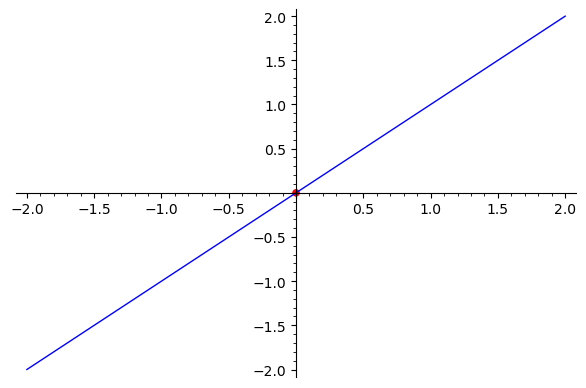

In [43]:
var('mu D')
f(x) = mu*x - D*x
raízes = solve(f,x)
show("Raízes=",raízes)
F=plot(f(mu=2, D=1),(x,-2,2))
P=points([(0,0)], pointsize=30, color='red')
F+P

In [46]:
@interact
def linear(mu=(-2,2,1),D=(-1,1,1)):
    P = plot(f(mu=mu, D=D), (x,-1.5,1.5))
    raízes = solve(f,x)
    show("Raízes=",raízes)
    P2=points([(0,0)], pointsize=30, color='red')
    show(P+P2)

Interactive function <function linear at 0x6ffecab01290> with 2 widgets
  mu: IntSlider(value=0, description='mu', max=2, min=-2)
  D: IntSlider(value=0, description='D', max=1, min=-1)

In [95]:
var('x s mu D Sf X Y mumax Ks')

mu==mumax*s/(Ks + s)

X = function('X')(t)
S = function('S')(t)
de1 = diff(X,t) == mu*X - D*X
de2 = diff(S,t) == D*Sf - D*S -(mu*X/Y)
sol = desolve_system([de1,de2],[X,S],ics=[0,500,0], ivar=t)
show(sol)

[X(t) == 500*e^(-(D - mu)*t),
 S(t) == Sf - (Sf*Y - 500)*e^(-D*t)/Y - 500*e^(-(D - mu)*t)/Y]

Legenda: 


Azul==X (Concentração celular)

Verde==S (Concentração de substrato)

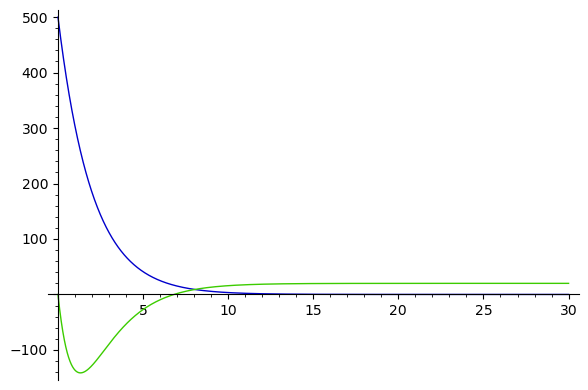

In [97]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.5, D=1, Y=0.8, Sf=20),solS(mu=0.5, D=1, Y=0.8, Sf=20)),(t,0,30))

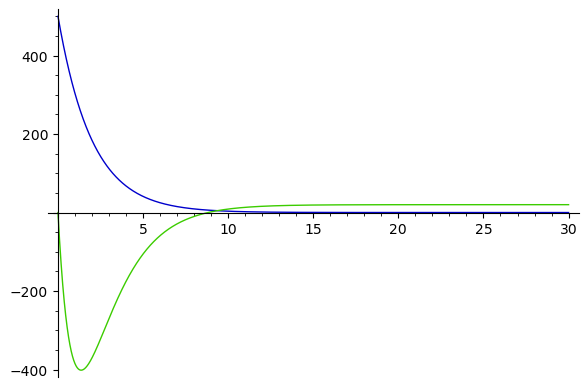

In [81]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.5, D=1, Y=0.3, Sf=20),solS(mu=0.5, D=1, Y=0.3, Sf=20)),(t,0,30))

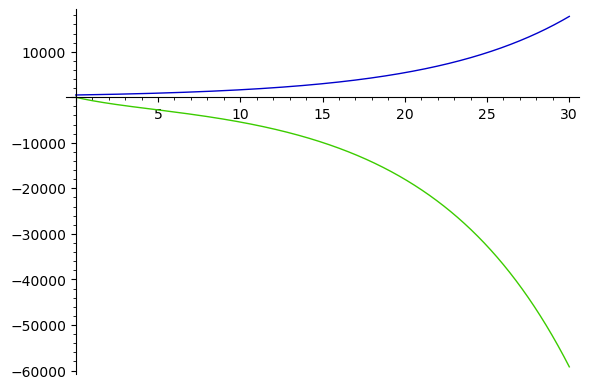

In [82]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.5, D=0.381, Y=0.3, Sf=1),solS(mu=0.5, D=0.381, Y=0.3, Sf=1)),(t,0,30))

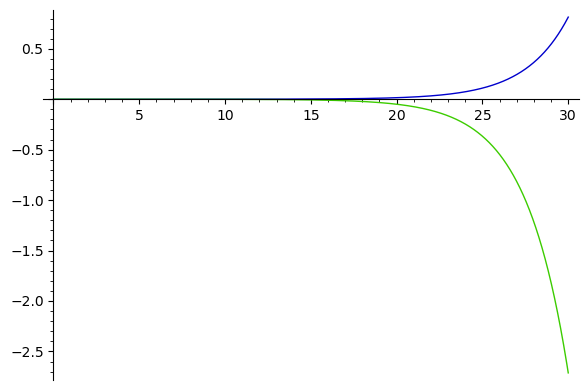

In [83]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.5, D=0.1, Y=0.3, Sf=1),solS(mu=0.5, D=0.1, Y=0.3, Sf=1)),(t,0,30))

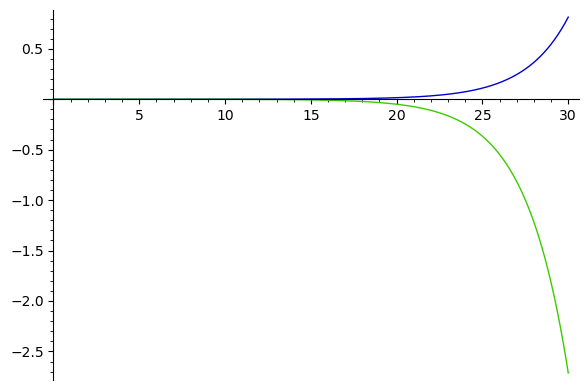

In [84]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.5, D=0.1, Y=0.3, Sf=10),solS(mu=0.5, D=0.1, Y=0.3, Sf=10)),(t,0,30))

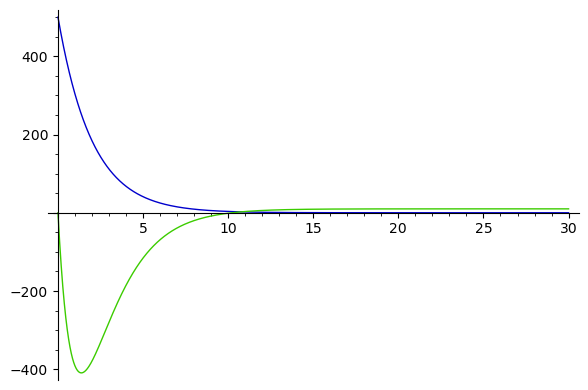

In [85]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.5, D=1, Y=0.3, Sf=10),solS(mu=0.5, D=1, Y=0.3, Sf=10)),(t,0,30))

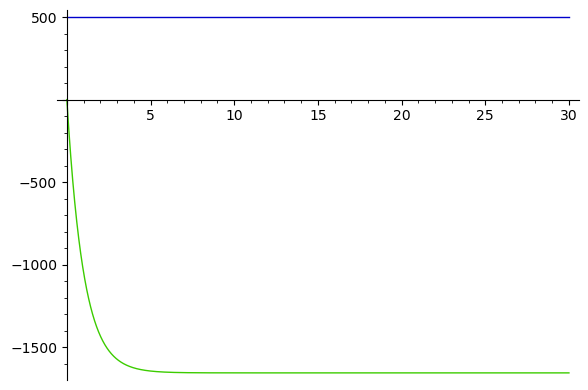

In [86]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=1, D=1, Y=0.3, Sf=10),solS(mu=1, D=1, Y=0.3, Sf=10)),(t,0,30))

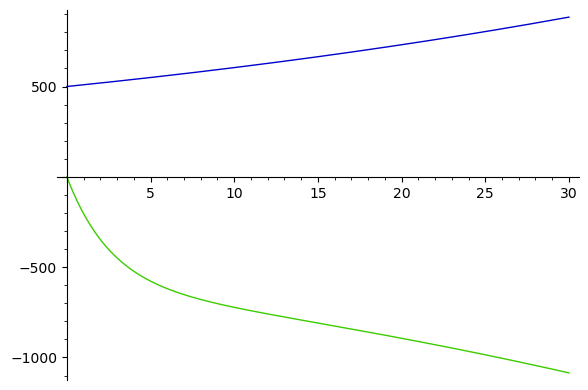

In [87]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.4, D=0.381, Y=0.8, Sf=20),solS(mu=0.4, D=0.381, Y=0.8, Sf=20)),(t,0,30))

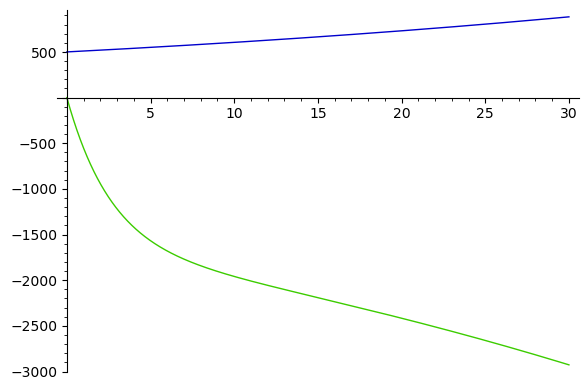

In [88]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.4, D=0.381, Y=0.3, Sf=20),solS(mu=0.4, D=0.381, Y=0.3, Sf=20)),(t,0,30))

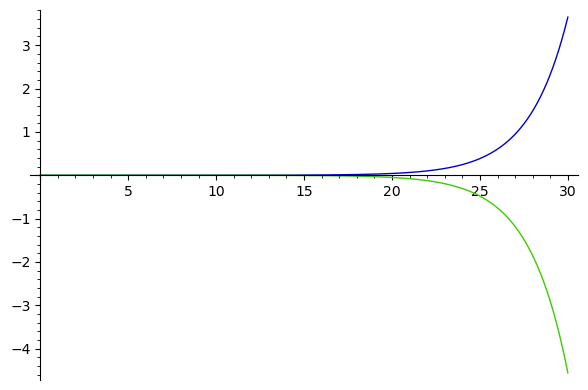

In [89]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=1.45, D=1, Y=0.8, Sf=20),solS(mu=1.45, D=1, Y=0.8, Sf=20)),(t,0,30))

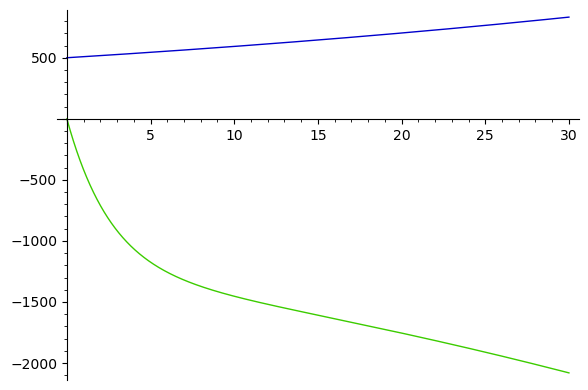

In [91]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.398, D=0.381, Y=0.4, Sf=1),solS(mu=0.398, D=0.381, Y=0.4, Sf=1)),(t,0,30))

'Raízes=' [s == (D*Sf*Y - X*mu)/(D*Y)]

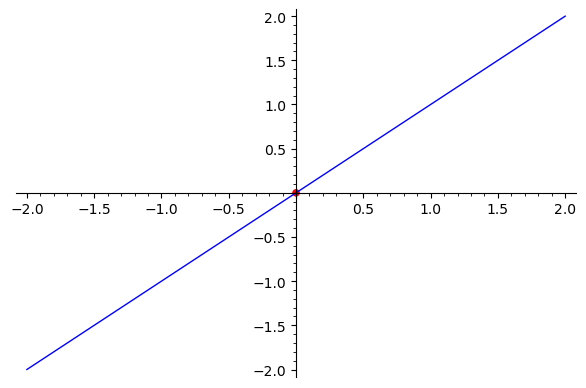

In [16]:
var('mu D Sf X Y')
f(s) = D*Sf - D*s -(mu*X/Y)
raízes = solve(f,s)
show("Raízes=",raízes)
F=plot(s(mu=2, D=1, Sf=20, X=0, Y=0.8),(s,-2,2))
P=points([(0,0)], pointsize=30, color='red')
F+P

'Raízes=' [s == (D*Sf*Y - mu*x)/(D*Y)]

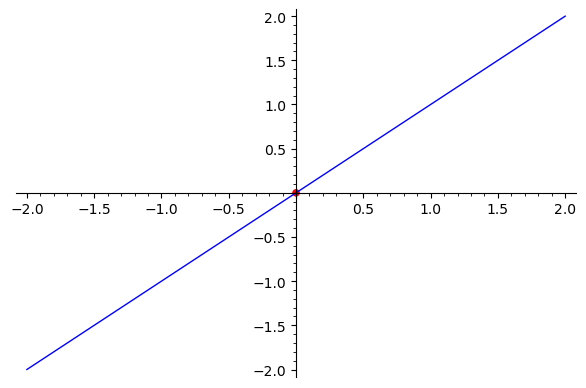

In [17]:
var('mu D Sf Y')
f(s) = D*Sf - D*s -(mu*x/Y)
raízes = solve(f,s)
show("Raízes=",raízes)
F=plot(s(mu=2, D=1, Sf=20, X=0, Y=0.8),(s,-2,2))
P=points([(0,0)], pointsize=30, color='red')
F+P

In [19]:
def fun(t,y):
    x,s = y
    return [Y*(Sf-(Ks*D)/(mumax-D)),
            Ks*D/(mumax-D)]

In [27]:
'''T = ode_solver()
T.algorithm='rk8pd'
T.function = fun
y0=[1,0]
T.ode_solve(t_span=[0,10],y_0=y0, num_points=100)'''

#Verificar como resolver esse problema depois

"T = ode_solver()\nT.algorithm='rk8pd'\nT.function = fun\ny0=[1,0]\nT.ode_solve(t_span=[0,10],y_0=y0, num_points=100)"

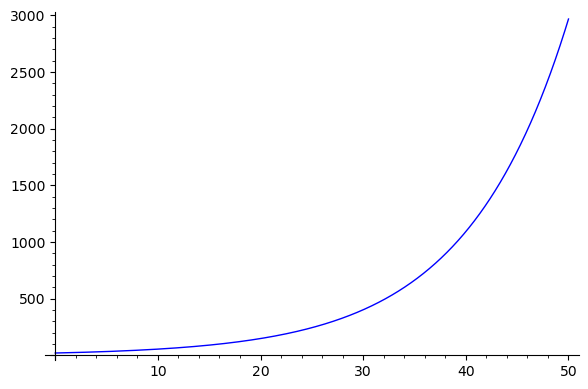

In [26]:
var('t')
mu = 0.2
D = 0.1
x0 = 20
x(t) = x0*exp((mu-D)*t)
plot(x(t),(t,0,50))

Verificando mu:

In [119]:
var('t x s mu D Sf X Y mumax Ks')

X = function('X')(t)
S = function('S')(t)
de1 = diff(X,t) == mu*X - D*X
de2 = diff(S,t) == D*Sf - D*S -(mu*X/Y)
sol = desolve_system([de1,de2],[X,S],ics=[0,500,0], ivar=t)
show(sol)

[X(t) == 500*e^(-(D - mu)*t),
 S(t) == Sf - (Sf*Y - 500)*e^(-D*t)/Y - 500*e^(-(D - mu)*t)/Y]

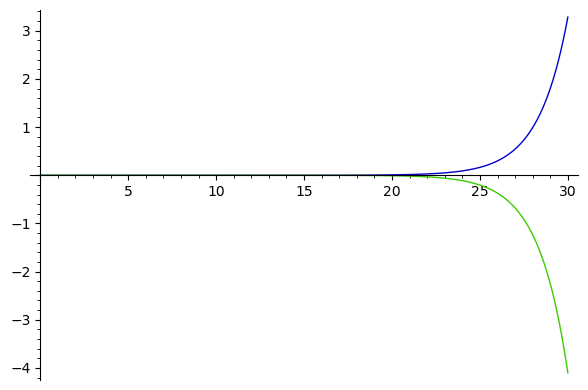

In [121]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=1.6, Ks= 1, D=1, Y=0.8, Sf=20),solS(mu=1.6, Ks= 1, D=1, Y=0.8, Sf=20)),(t,0,30))